In [1]:
import candas as can
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.use('Cairo')  # for saving SVGs that Affinity Designer can parse
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import pathlib as pl

code_pth = pl.Path.cwd()  # for running in Jupyter
# code_pth = pl.Path(__file__)  # for running in terminal
fig_pth = code_pth.parent
data_pth = fig_pth / 'data'
graph_pth = fig_pth / 'graphics'
graph_pth.mkdir(exist_ok=True)

gen_pth = fig_pth / 'generated'
gen_pth.mkdir(exist_ok=True)

plt.style.use(str(can.style.breve))

%config InlineBackend.figure_format = 'retina'

In [2]:
from utils import savefig

In [3]:
JG045A = (
    can.test.QuantStudio(data_pth / "JG045A TMCC1 Gen3 EvaGreen.xlsx", "JG045A")
    .import_data()
    .format_reactions()
    .index_reactions()
    .subtract_background(cycle_end=7)
    .get_derivatives()
    .annotate_reactions()
    .trim_reactions()
)

In [6]:
JG045A.reactions.data.query("WellPosition in @outliers").Well.unique()

array([ 17,  41,  65,  89, 113, 137, 157, 158, 161, 320, 350, 373])

/tmp/ipykernel_75214/988036930.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reactions.lg10_Copies = reactions.lg10_Copies.astype(int)


Saving fig_2B__paper_termite in /home/john/projects/can-manuscript/fig_2__glass_rattlesnake/graphics: [.svg] [.png] done


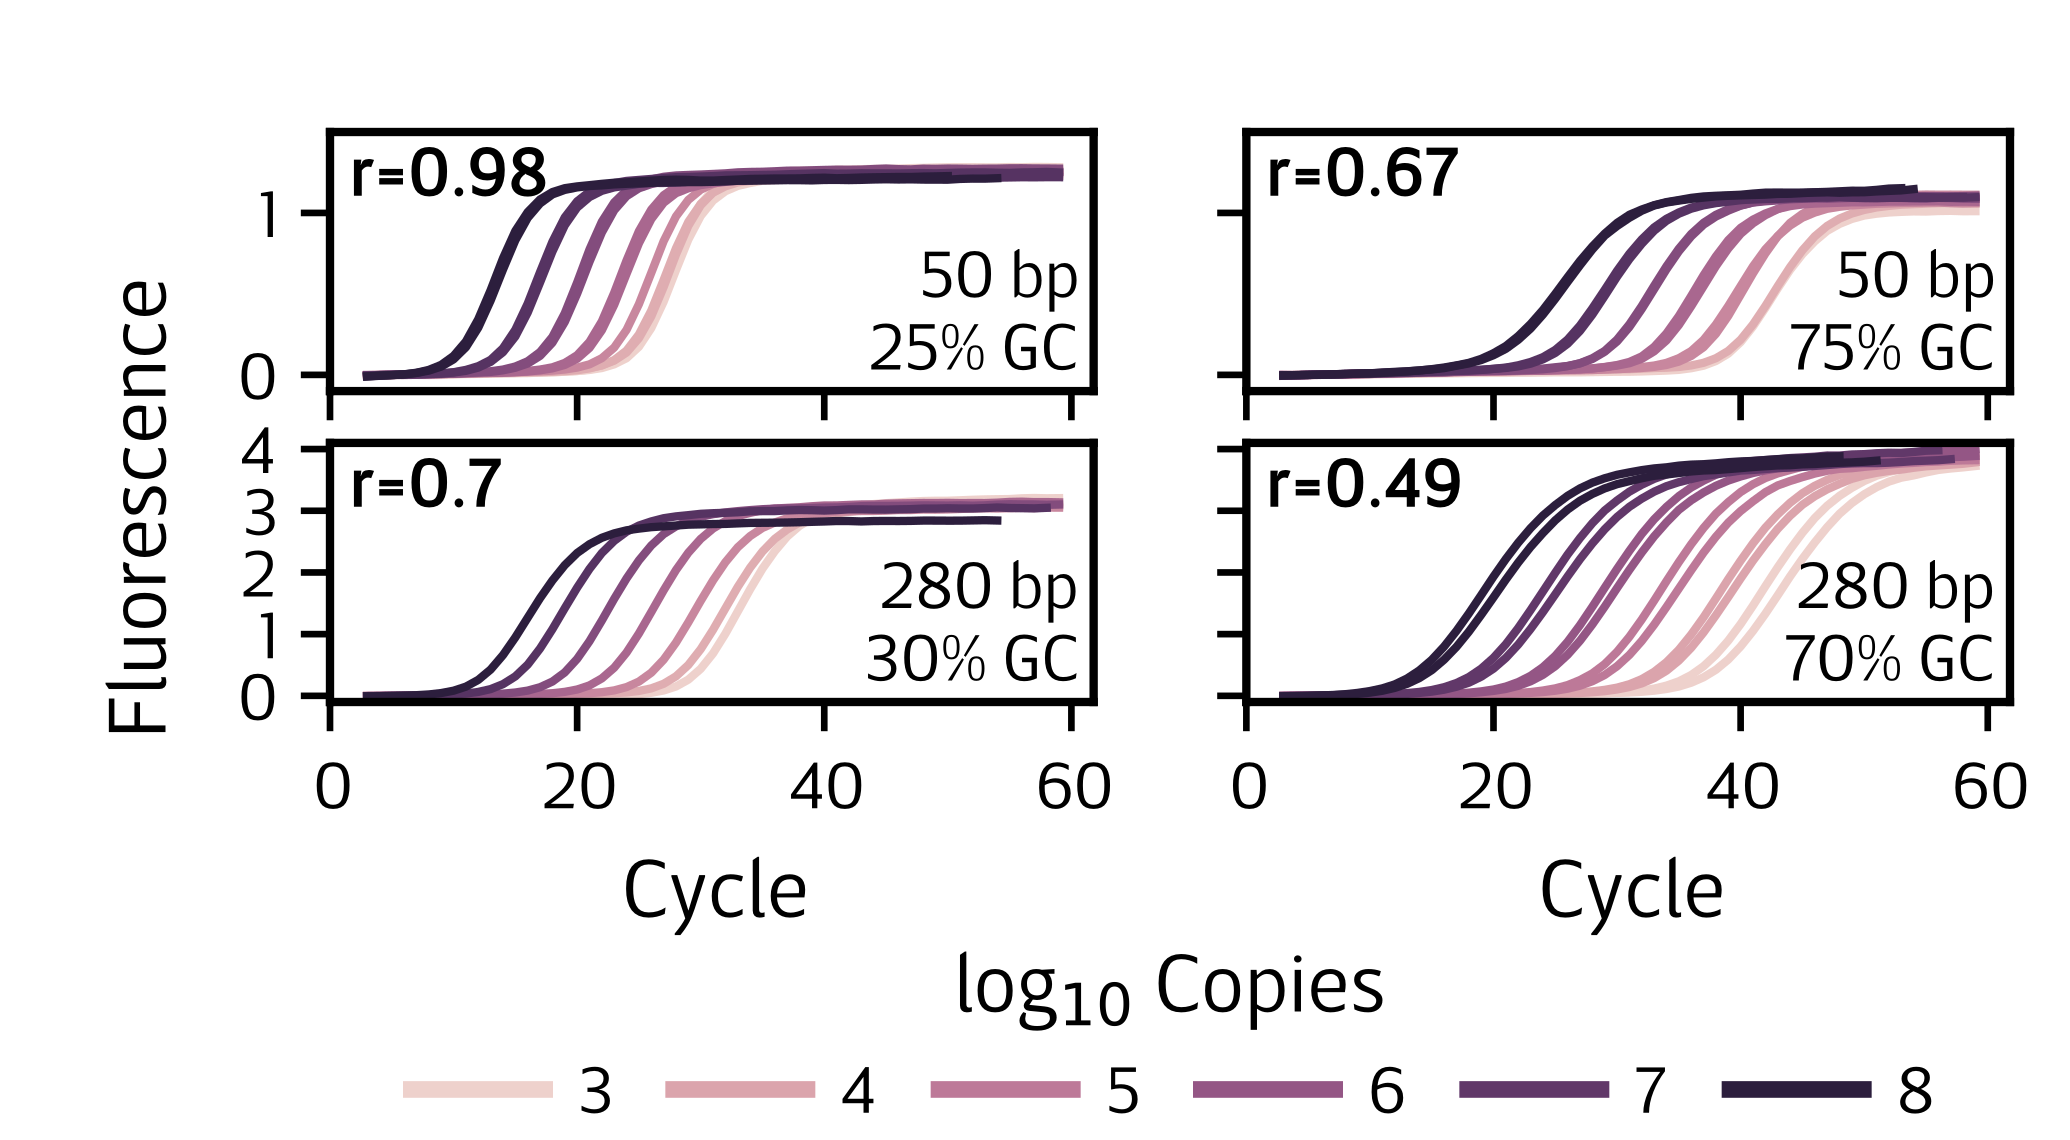

In [4]:
targets = ["BP50_GC25", "BP50_GC75", "BP280_GC30", "BP280_GC70"]
rates = [0.98, 0.67, 0.70, 0.49]
outliers = [
    "N8",
    "P13",
    "O14",
    "G13",
    "G14",
    "A17",
    "B17",
    "C17",
    "D17",
    "E17",
    "F17",
    "G17",
]

reactions = JG045A.reactions.data.query(
    "Target in @targets and WellPosition not in @outliers and Cycle<60"
)

reactions.lg10_Copies = reactions.lg10_Copies.astype(int)

width = 3.45
height = 1.65+0.25
figsize = (width, height)
spotsize = 8**2
linewidth = 2
ticklabelsize = 8
labelsize = 10
titlesize = labelsize + 2

fig, axs = plt.subplots(2, 2, figsize=(width, height), sharex=True, sharey="row")

for target, rate, ax in zip(targets, rates, axs.flat):
    sns.lineplot(
        data=reactions.query("Target==@target"),
        x="Cycle",
        y="Fluorescence",
        units="Reaction",
        estimator=None,
        hue="lg10_Copies",
        palette="ch:0",
        legend=ax == axs[1, 1],
        ax=ax,
        linewidth=1,
    )

    parts = target.split("_")
    bp = parts[0][2:] + " bp"
    gc = parts[1][2:] + "% GC"
    name = parts[2] if len(parts) > 2 else ""
    title = f"{name}\n{bp}\n{gc}"
    ax.text(
        0.975,
        0.025,
        title,
        fontsize=ticklabelsize,
        horizontalalignment="right",
        verticalalignment="bottom",
        transform=ax.transAxes,
    )
    ax.text(
        0.025,
        0.95,
        f"r={rate}",
        fontsize=ticklabelsize,
        fontweight="bold",
        horizontalalignment="left",
        verticalalignment="top",
        transform=ax.transAxes,
    )
    

sns.move_legend(
    ax,
    "lower center",
    bbox_to_anchor=(-0.1, -1.875),
    ncol=7,
    title=r"log$_{10}$ Copies",
    title_fontsize=10,
    fontsize=8,
    frameon=False,
    handletextpad = 0.5,
    columnspacing = 1
)


for ax in axs.flat:
    ax.set_xlabel("Cycle", fontsize=labelsize)
    ax.set_xticks([0, 20, 40, 60])
    # ax.set_xlim([0, 41])
    # ax.set_ylim([-1.1,1.1])
    ax.set_ylabel("", fontsize=labelsize)
    ax.set_yticks(np.arange(5))
    # ax.set_yticklabels([1.0, 0.5, 0.0, 0.5, 1.0])
    ax.tick_params(axis="both", labelsize=ticklabelsize)
    plt.setp(ax.spines.values(), linewidth=1)

plt.setp(axs[0, :], ylim=[-0.1, 1.5])
plt.setp(axs[1, :], ylim=[-0.1, 4.1])

mar_l = 0.55
mar_r = 0.1
mar_t = 0.22
mar_b = 0.48+0.25

plt.subplots_adjust(
    left=mar_l / width,
    right=1 - mar_r / width,
    top=1 - mar_t / height,
    bottom=mar_b / height,
)

fig.text(
    0.07,
    0.55,
    "Fluorescence",
    fontsize=labelsize,
    ha="center",
    va="center",
    rotation="vertical",
)

savefig(fig, alias="paper_termite")